In [1]:
import numpy as np
import networkx as nx
import pandas as pd
from numpy.random import uniform, randint
from node import EpidemicGraph, TransitionDiagram, calc_R0
from random import sample
%matplotlib inline

(900, 900)
((0.8537924476113022+0j), 1.3898485638450484)


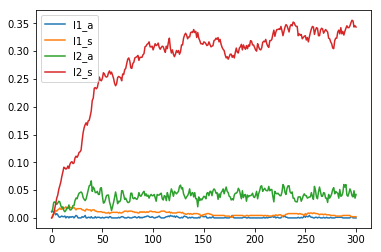

In [15]:
paramet = {
        'alpha': [0.03, 0.06], # infect rate 
        'mu': [0.14, 0.14], # sleep s 
        'gamma': [0.35, 0.47], # rec rate 
        'lambda': [0.05, 0.32], # sleep I1 
        'kappa': [0.04, 0.31] # sleep I2    % [I2_s -> I2_a, I2_a -> I2_s]
    }
N = 900
r = 3
# paramet = {
#         'alpha': [0.03, 0.35], # infect rate 
#         'mu': [0.14, 0.14], # sleep s 
#         'gamma': [0.35, 0.3], # rec rate 
#         'lambda': [0.05, 0.32], # sleep I1 
#         'kappa': [0.04, 0.31] # sleep I2    % [I2_s -> I2_a, I2_a -> I2_s]
#     }

a = EpidemicGraph(N,r,paramet,I1_a=10, I2_a=10, grid_size=[30,30], net='Uniform Grid')
print(calc_R0(a.G, paramet))

a.run(300)
# a.G[0]
asd = a.hist2pandas()
# asd.plot()
asd1 = asd[['I1_a','I1_s','I2_a','I2_s']]/N
asd1.plot()

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
(900, 900)


((0.8537924476113022+0j), 1.3898485638450484)

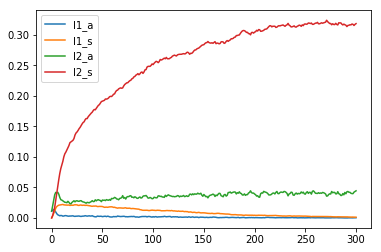

In [18]:
def monte(n, r, paramet, nstep=300):
    listt = []
    for i in range(n):
        a = EpidemicGraph(N, r, paramet, I1_a=10, I2_a=10, grid_size=[30,30])
        a.run(nstep)
        listt.append(a.hist2pandas())
        print(i+1, end=' ')
    print()
    df = listt[0]
    del listt[0]
    for v in listt:
        df += v
    df /= n
    return df

asd_monte = monte(15, r, paramet, 300)
asd1 = asd_monte[['I1_a','I1_s','I2_a','I2_s']]/N
asd1.plot()
calc_R0(a.G, paramet)

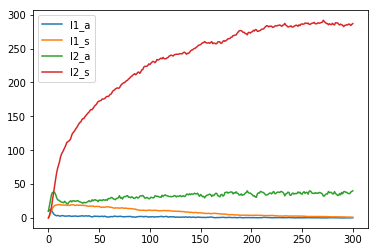

In [20]:
asd = asd_monte[['I1_a','I1_s','I2_a','I2_s']]
asd.plot()
asd_monte.to_csv('monte_random_15.csv')

In [15]:
print(sample(list(a.G[0]), len(a.G[0])))
list(a.G[0])


[122, 802, 676, 228, 182, 483, 221, 893, 133, 783, 764, 325, 450, 530, 432, 438, 286, 158, 353, 155, 648, 850, 833, 22, 64]


[22,
 64,
 122,
 133,
 155,
 158,
 182,
 221,
 228,
 286,
 325,
 353,
 432,
 438,
 450,
 483,
 530,
 648,
 676,
 764,
 783,
 802,
 833,
 850,
 893]

In [56]:
nod = a.G.node[0]
# nod['state'] = 'I1_a'
diag.next(a.G, 0)
a.G.node[0]['state'] = a.G.node[0]['next_state']
a.G.node[0]

{'state': 'S_a',
 'position': array([0.79454763, 6.50435499]),
 'next_state': 'S_a'}

In [40]:
uniform(0,[10,1],2)
randint(0, 100,10)
s= sample(range(20), 10)
# print(s[:5], s[5:])
print(s)
del s[1]
s

[10, 9, 6, 3, 7, 11, 0, 12, 8, 2]


[10, 6, 3, 7, 11, 0, 12, 8, 2]

In [31]:
paramet = {
        'alpha': [0.03, 0.06], # infect rate 
        'mu': [0.14, 0.14], # sleep s 
        'gamma': [0.35, 0.47], # rec rate 
        'lambda': [0.05, 0.32], # sleep I1 
        'kappa': [0.04, 0.31] # sleep I2    % [I2_s -> I2_a, I2_a -> I2_s]
    }

def dist(pos1,pos2):
#     return math.sqrt((pos1-pos2))
    return np.linalg.norm(pos1-pos2)

dist(np.array([0,0]), np.array([0,1]))

1.0

In [5]:
transitions = {
            'S_a': {
                'S_s': paramet['mu'][1],
                'I1_a': paramet['alpha'][0],
                'I2_a': paramet['alpha'][1]
            },
            'S_s': {
                'S_a': paramet['mu'][0]
            },
            'I1_a': {
                'S_a': paramet['gamma'][0],
                'I1_s': paramet['lambda'][1]
            },
            'I1_s': {
                'I1_a': paramet['lambda'][0]
            },
            'I2_a': {
                'S_a': paramet['gamma'][1],
                'I2_s': paramet['kappa'][1]
            },
            'I2_s':{
                'I2_a': paramet['kappa'][0]
            }
        }
transitions


{'S_a': {'S_s': 0.14, 'I1_a': 0.03, 'I2_a': 0.06},
 'S_s': {'S_a': 0.14},
 'I1_a': {'S_a': 0.35, 'I1_s': 0.32},
 'I1_s': {'I1_a': 0.05},
 'I2_a': {'S_a': 0.47, 'I2_s': 0.31},
 'I2_s': {'I2_a': 0.04}}

In [64]:
[x for x, y in a.G.nodes(data=True) if y['state']=='S_a']
population_count = {
            'S_a':  10,
            'S_s':  0,
            'I1_a': 0,
            'I1_s': 0,
            'I2_a': 0,
            'I2_s': 0
        }
def foo(v):
            if v < 0:
                return False
            else:
                return True
all([foo(v) for v in population_count.values()])

True

In [25]:
from pymatbridge import Matlab
mlab = Matlab(executable='C:\Program Files\MATLAB\MATLAB Production Server\R2015a\bin\matlab')

mlab.start()
results = mlab.run_code('a=1')

Starting MATLAB on ZMQ socket tcp://127.0.0.1:12274
Send 'exit' command to kill the server
............................................................MATLAB session timed out after 60 seconds


ValueError: MATLAB failed to start

In [ ]:
res = mlab.run_func('path/to/jk.m', {'arg1': 3, 'arg2': 5})
print(res['result'])